# 3️⃣ 신한은행 - 서울시 지역단위 '소득', '지출', '금융자산' 정보

---

## 전체 데이터 파악하기

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NanumBarunpenR.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
file_path = './신한은행_서울시 지역단위 \'소득\', \'지출\', \'금융자산\' 정보.csv'
df = pd.read_csv(file_path, encoding='cp949')

print(df.shape)
print(df.info())
df.head()

(1039568, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039568 entries, 0 to 1039567
Data columns (total 20 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   기준년월      1039568 non-null  int64  
 1   지역구       1039568 non-null  object 
 2   법정동코드     1039568 non-null  int64  
 3   법정동       1039568 non-null  object 
 4   집계구코드     1039568 non-null  float64
 5   나이        1039568 non-null  int64  
 6   성별        1039568 non-null  int64  
 7   직장인여부     1039568 non-null  int64  
 8   급여입금      1039568 non-null  int64  
 9   가맹점매출입금   1039568 non-null  int64  
 10  연금입금      1039568 non-null  int64  
 11  총소비금액     1039568 non-null  int64  
 12  총수신금액     1039568 non-null  int64  
 13  예적금금액     1039568 non-null  int64  
 14  신탁금액      1039568 non-null  int64  
 15  수익증권금액    1039568 non-null  int64  
 16  신용대출금액    1039568 non-null  int64  
 17  담보대출금액    1039568 non-null  int64  
 18  주택대출금액    1039568 non-null  int64  
 19  전세자금대출금

,기준년월,지역구,법정동코드,법정동,집계구코드,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,201903,강남구,11680101,역삼동,1.120000e+12,2,1,0,0,0,0,2018319,2430312,0,0,0,0,0,0,0
1,201903,강남구,11680101,역삼동,1.120000e+12,2,2,0,0,0,0,2326837,2221251,0,0,0,0,0,0,0
2,201903,강남구,11680101,역삼동,1.120000e+12,3,1,0,0,0,0,1771639,1382057,1841250,0,0,0,0,0,0
3,201903,강남구,11680101,역삼동,1.120000e+12,3,2,0,0,0,0,1745601,2902578,3561440,0,0,0,0,0,0
4,201903,강남구,11680101,역삼동,1.120000e+12,4,1,0,0,0,0,1712433,1746992,8831666,0,0,0,0,0,0


In [3]:
df.columns

Index(['기준년월', '지역구', '법정동코드', '법정동', '집계구코드', '나이', '성별', '직장인여부', '급여입금',
       '가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',
       '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액'],
      dtype='object')

##### 결측 데이터 조회

In [4]:
df.isnull().sum()

기준년월        0
지역구         0
법정동코드       0
법정동         0
집계구코드       0
나이          0
성별          0
직장인여부       0
급여입금        0
가맹점매출입금     0
연금입금        0
총소비금액       0
총수신금액       0
예적금금액       0
신탁금액        0
수익증권금액      0
신용대출금액      0
담보대출금액      0
주택대출금액      0
전세자금대출금액    0
dtype: int64

---

#### 자치구 ('지역구') 확인하기

In [5]:
county = df['지역구'].unique()
print(county)
print(len(county))
print(df['지역구'].value_counts().sort_index())

['강남구' '강동구' '강북구' '강서구' '관악구' '광진구' '구로구' '금천구' '노원구' '도봉구' '동대문구' '동작구'
 '마포구' '서대문구' '서초구' '성동구' '성북구' '송파구' '양천구' '영등포구' '용산구' '은평구' '종로구' '중구'
 '중랑구']
25
강남구     55601
강동구     45341
강북구     33833
강서구     62611
관악구     54845
광진구     38192
구로구     41700
금천구     24284
노원구     57599
도봉구     37119
동대문구    36774
동작구     43572
마포구     40649
서대문구    33733
서초구     45404
성동구     33053
성북구     47630
송파구     68405
양천구     47630
영등포구    39104
용산구     25326
은평구     50430
종로구     18127
중구      15654
중랑구     42952
Name: 지역구, dtype: int64


---

In [6]:
# 각 지역구가 맞는지 판별하기 위한 True/False
iscounty = []
for i in range(len(county)):
    iscounty.append(df['지역구'] == county[i])
    
# 각 지역구의 데이터프레임
counties = []
for j in range(25):
    counties.append(df[iscounty[j]])

---

# 🔔 총소비금액

### ⚪각 자치구 별 총소비금액이 0 이하인 데이터 확인하기

In [7]:
iszero = []
i = 0
sum = 0
for i in range(25):
    iszero.append(counties[i]['총소비금액'] <= 0)
    print(county[i] + ' : ' + str(len(counties[i][iszero[i]])))
    sum += len(counties[i][iszero[i]])

print("\n\n총합 : " + str(sum))

강남구 : 11480
강동구 : 9971
강북구 : 9195
강서구 : 13067
관악구 : 12629
광진구 : 10070
구로구 : 9421
금천구 : 4581
노원구 : 15652
도봉구 : 7532
동대문구 : 11410
동작구 : 8440
마포구 : 10202
서대문구 : 9894
서초구 : 9646
성동구 : 7350
성북구 : 13726
송파구 : 14468
양천구 : 12491
영등포구 : 11402
용산구 : 5482
은평구 : 10621
종로구 : 5312
중구 : 4057
중랑구 : 8688


총합 : 246787


#### ⚫ 각 자치구 별 총소비금액 (원본)

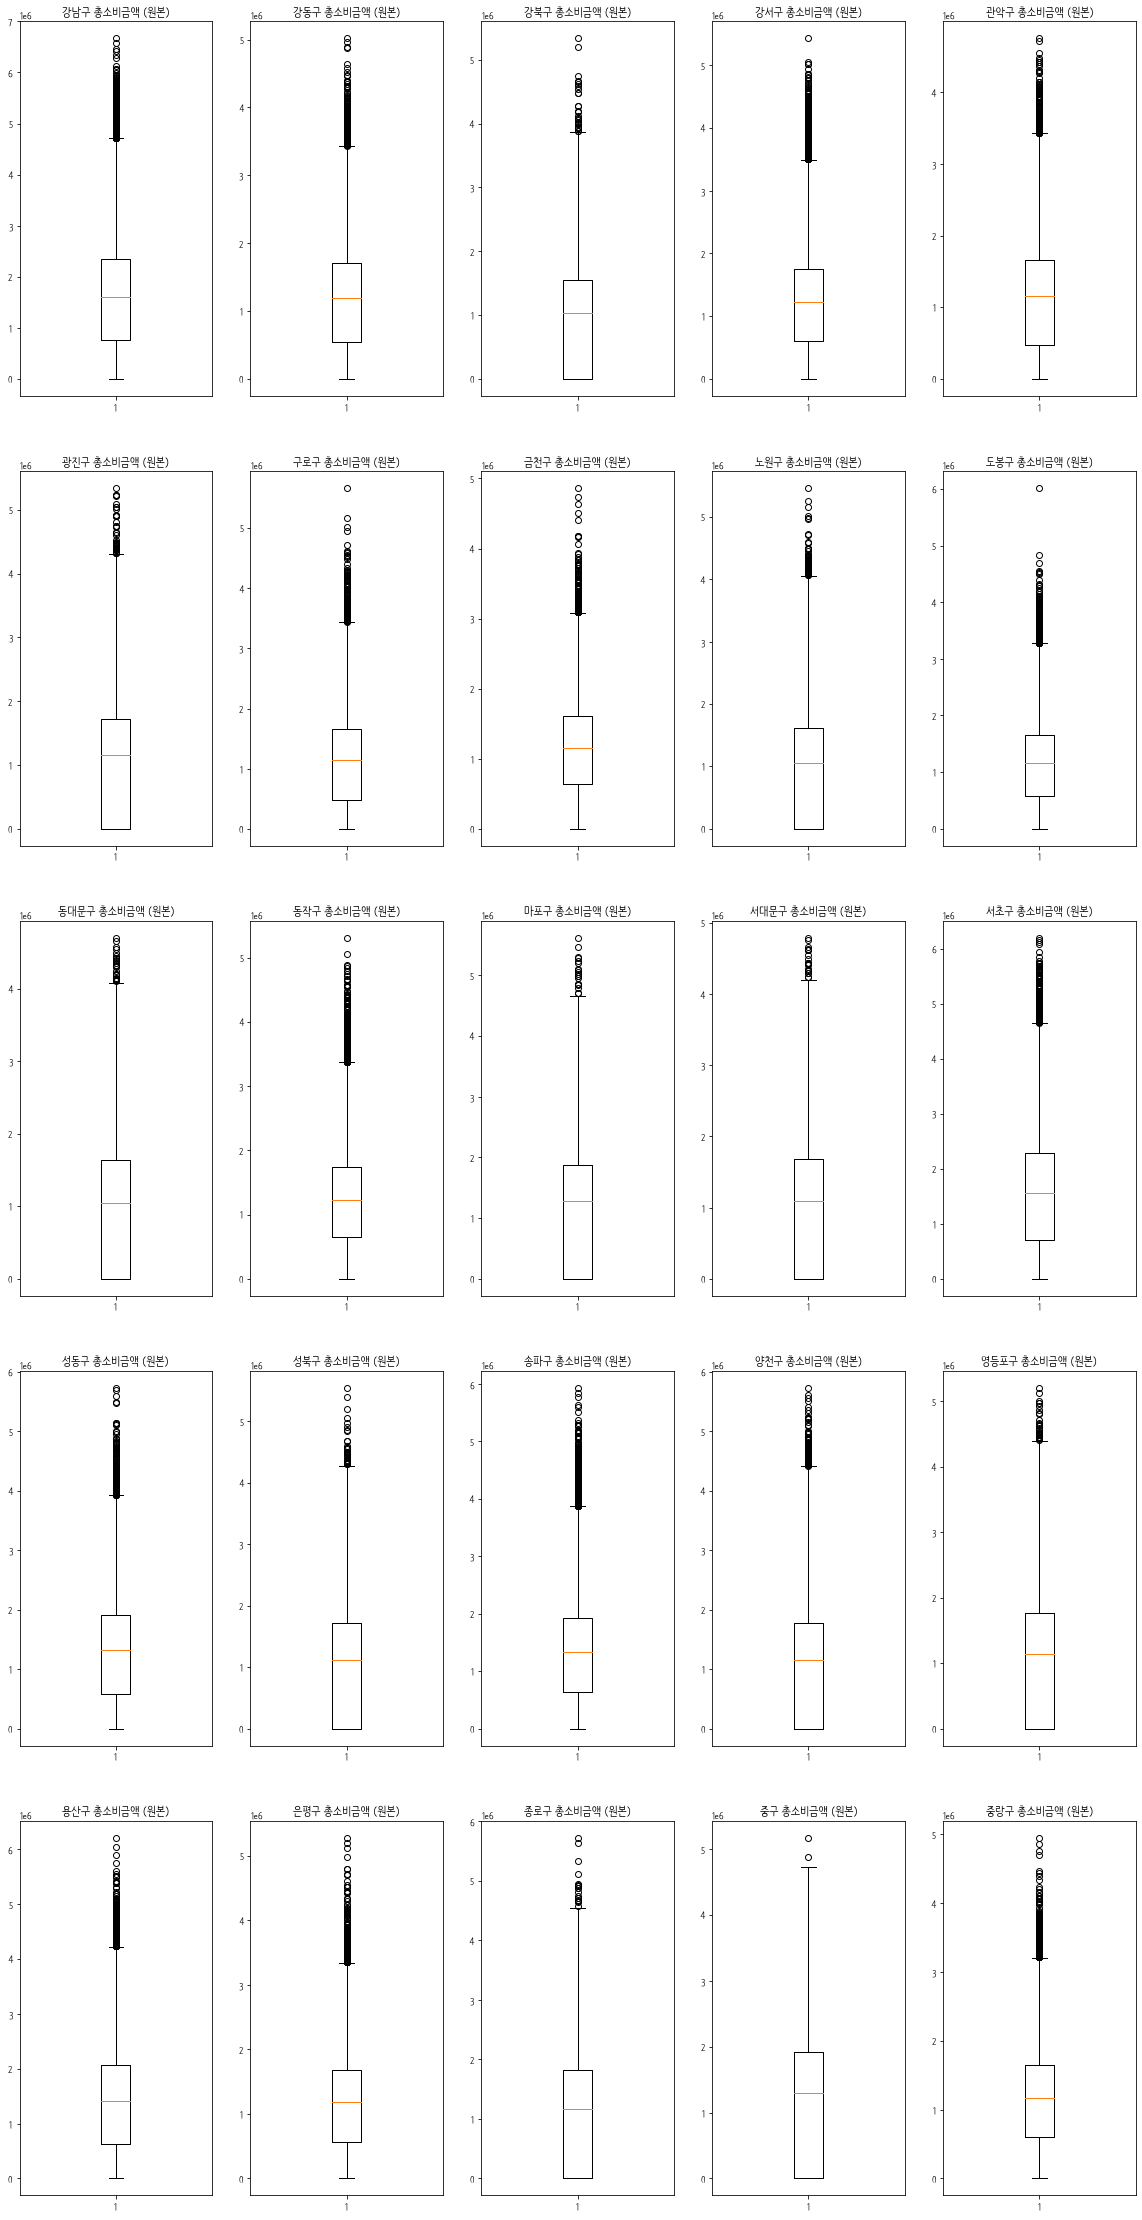

In [8]:
i, j, k = 0, 0, 0
fig, ax = plt.subplots(5, 5, figsize = (20, 40))
for j in range(5):
    for k in range(5):
        ax[j, k].boxplot(counties[i]['총소비금액'].values)
        ax[j, k].set_title(county[i] + ' 총소비금액 (원본)')
        i += 1

#### ⚫ 각 자치구 별 총소비금액 평균 (원본)

In [9]:
# 각 자치구 별 총소비금액 평균
mean = []
i = 0 
for i in range(25):
    mean.append(counties[i]['총소비금액'].mean())
    print(county[i] + ' : '+ str(counties[i]['총소비금액'].mean()))

강남구 : 1586555.1381989534
강동구 : 1154621.7874771177
강북구 : 1001000.2538350131
강서구 : 1201963.9666991422
관악구 : 1114532.224833622
광진구 : 1132744.4829807288
구로구 : 1113440.7030455635
금천구 : 1122246.671100313
노원구 : 1046063.49926214
도봉구 : 1135988.968398933
동대문구 : 1018855.9985859575
동작구 : 1205292.5569172862
마포구 : 1232179.5294841202
서대문구 : 1066451.77579818
서초구 : 1542715.9656858426
성동구 : 1294068.0892505976
성북구 : 1089190.6787108965
송파구 : 1309990.2349535853
양천구 : 1158823.0857442787
영등포구 : 1124017.897299509
용산구 : 1404551.1364605543
은평구 : 1141541.3277414239
종로구 : 1163765.732001986
중구 : 1251900.1257825475
중랑구 : 1127976.9223086236


---

#### ⚫ 각 자치구 별로 '총소비금액'이 0 이하인 데이터에 평균값(자치구 단위)으로 넣어주기

In [10]:
i = 0
for i in range(25):
    counties[i].loc[iszero[i], '총소비금액'] = counties[i]['총소비금액'].mean()

C:\Users\serak\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


---

#### ⚫ 각 자치구 별 총소비금액 (가공 이후)

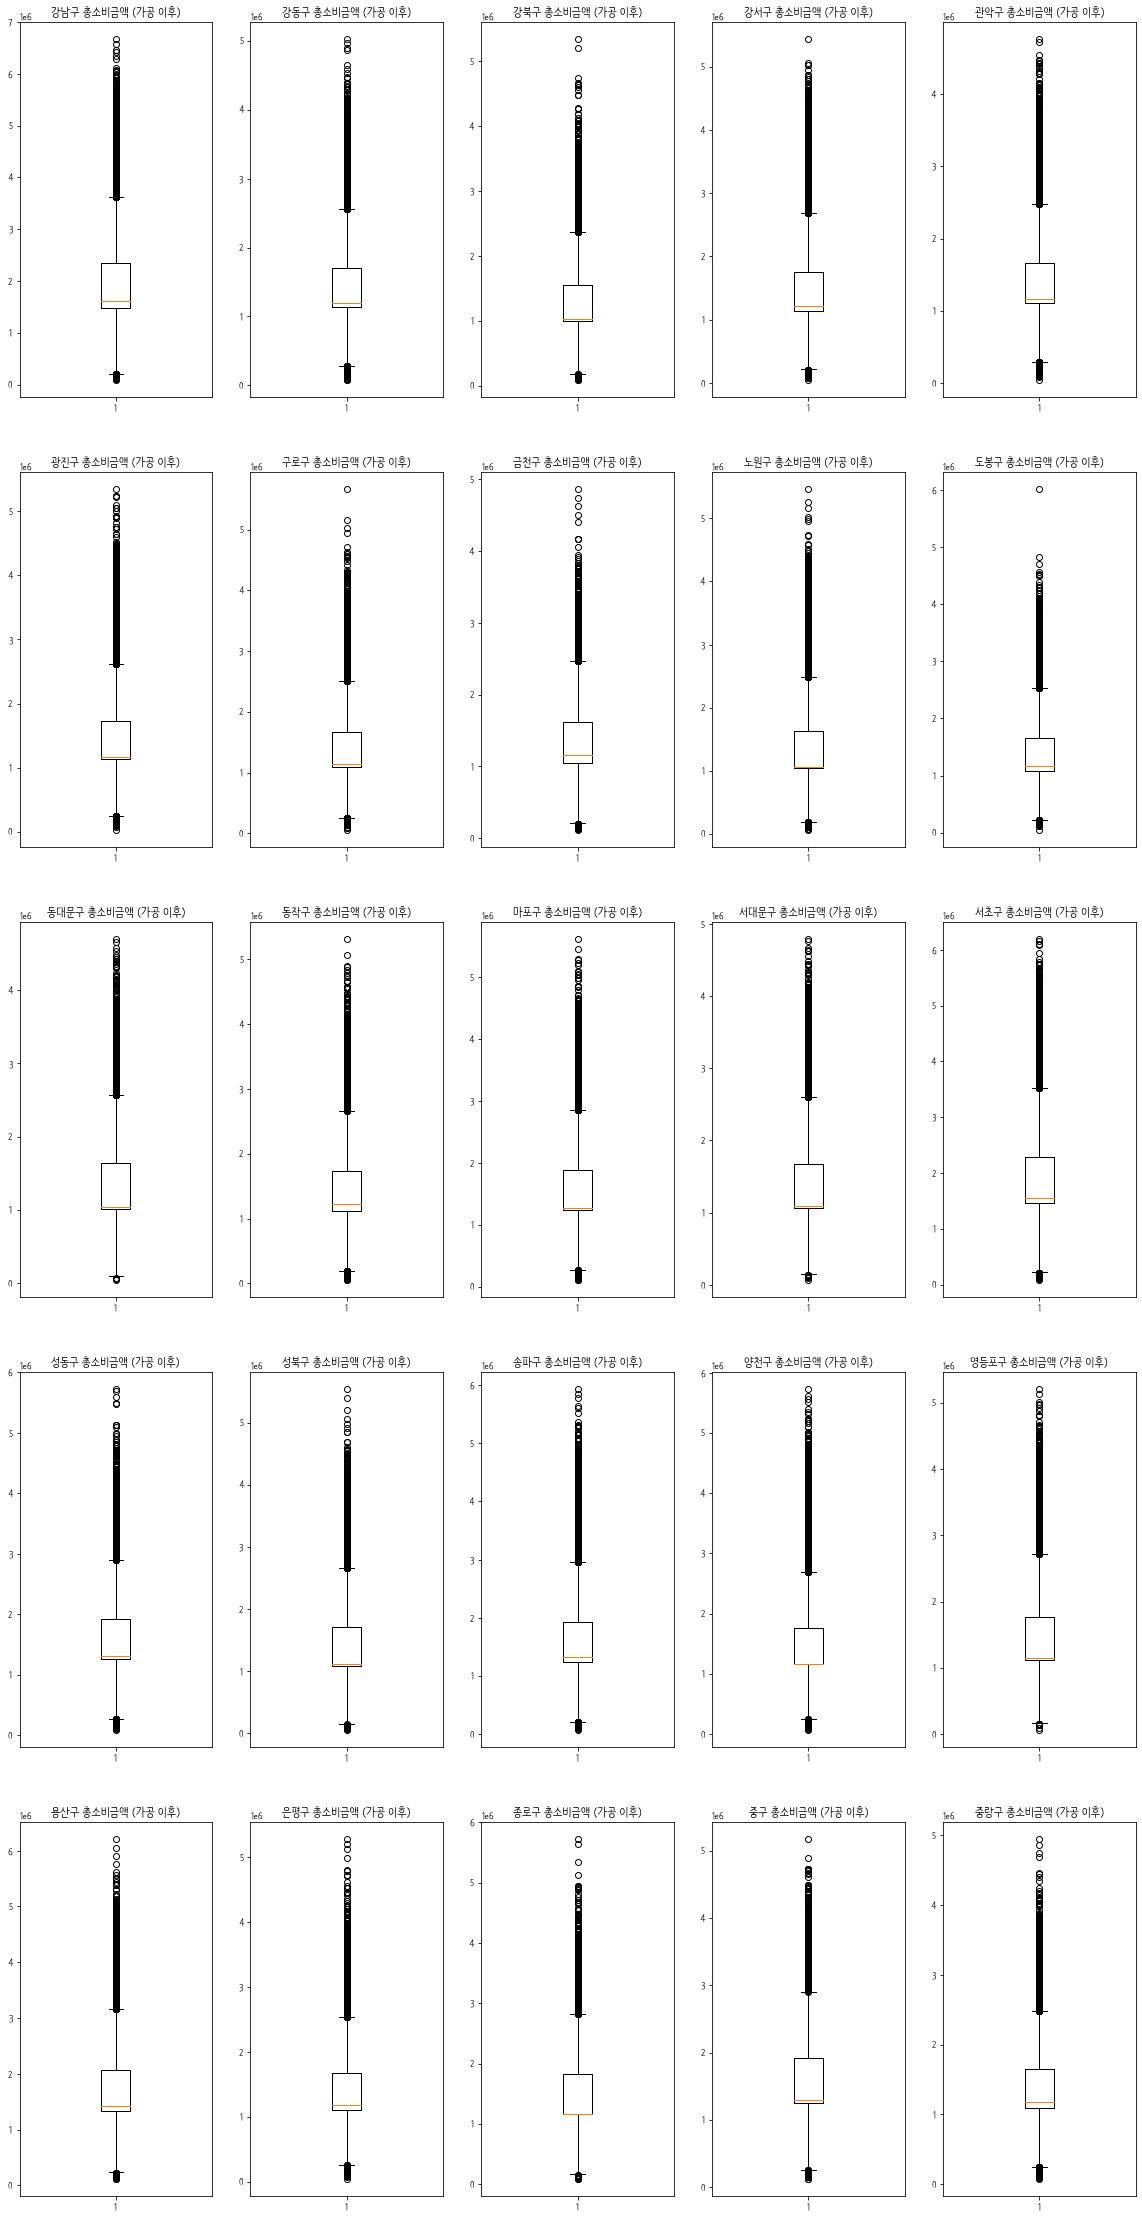

In [11]:
i, j, k = 0, 0, 0
fig, ax = plt.subplots(5, 5, figsize = (20, 40))
for j in range(5):
    for k in range(5):
        ax[j, k].boxplot(counties[i]['총소비금액'].values)
        ax[j, k].set_title(county[i] + ' 총소비금액 (가공 이후)')
        i += 1

#### ⚫ 각 자치구 별 총소비금액 평균 (가공 이후)

In [12]:
i = 0 
for i in range(25):
    print(county[i] + ' : '+ str(counties[i]['총소비금액'].mean()))

강남구 : 1914132.9333199554
강동구 : 1408536.2102495255
강북구 : 1273048.175509524
강서구 : 1452815.4648842164
관악구 : 1371172.3464019464
광진구 : 1431412.7104528514
구로구 : 1364992.8580431903
금천구 : 1333950.3443136096
노원구 : 1330321.6615644465
도봉구 : 1366498.1122331314
동대문구 : 1334980.0792916527
동작구 : 1438760.590984527
마포구 : 1541429.3402989407
서대문구 : 1379245.5940100655
서초구 : 1870463.261188214
성동구 : 1581830.1821314755
성북구 : 1403073.342074036
송파구 : 1587059.728694147
양천구 : 1462725.2306958574
영등포구 : 1451760.636278072
용산구 : 1708576.6173921386
은평구 : 1381959.9365447124
종로구 : 1504799.7458153965
중구 : 1576351.3082470049
중랑구 : 1356135.413206011


---

# 🔔 총수신금액

### ⚪  '총수신금액'이 0 이하인 데이터 확인하기

In [13]:
iszero = []
i = 0
sum = 0
for i in range(25):
    iszero.append(counties[i]['총수신금액'] <= 0)
    print(county[i] + ' : ' + str(len(counties[i][iszero[i]])))
    sum += len(counties[i][iszero[i]])

print("\n\n총합 : " + str(sum))

강남구 : 0
강동구 : 0
강북구 : 0
강서구 : 0
관악구 : 0
광진구 : 0
구로구 : 0
금천구 : 0
노원구 : 0
도봉구 : 0
동대문구 : 0
동작구 : 1
마포구 : 0
서대문구 : 0
서초구 : 0
성동구 : 0
성북구 : 0
송파구 : 2
양천구 : 0
영등포구 : 0
용산구 : 0
은평구 : 0
종로구 : 0
중구 : 0
중랑구 : 0


총합 : 3


---

#### ⚫ 각 자치구 별 총수신금액

- '총수신금액'이 0 이하인 경우가 거의 없으므로 가공 진행 하지 않음

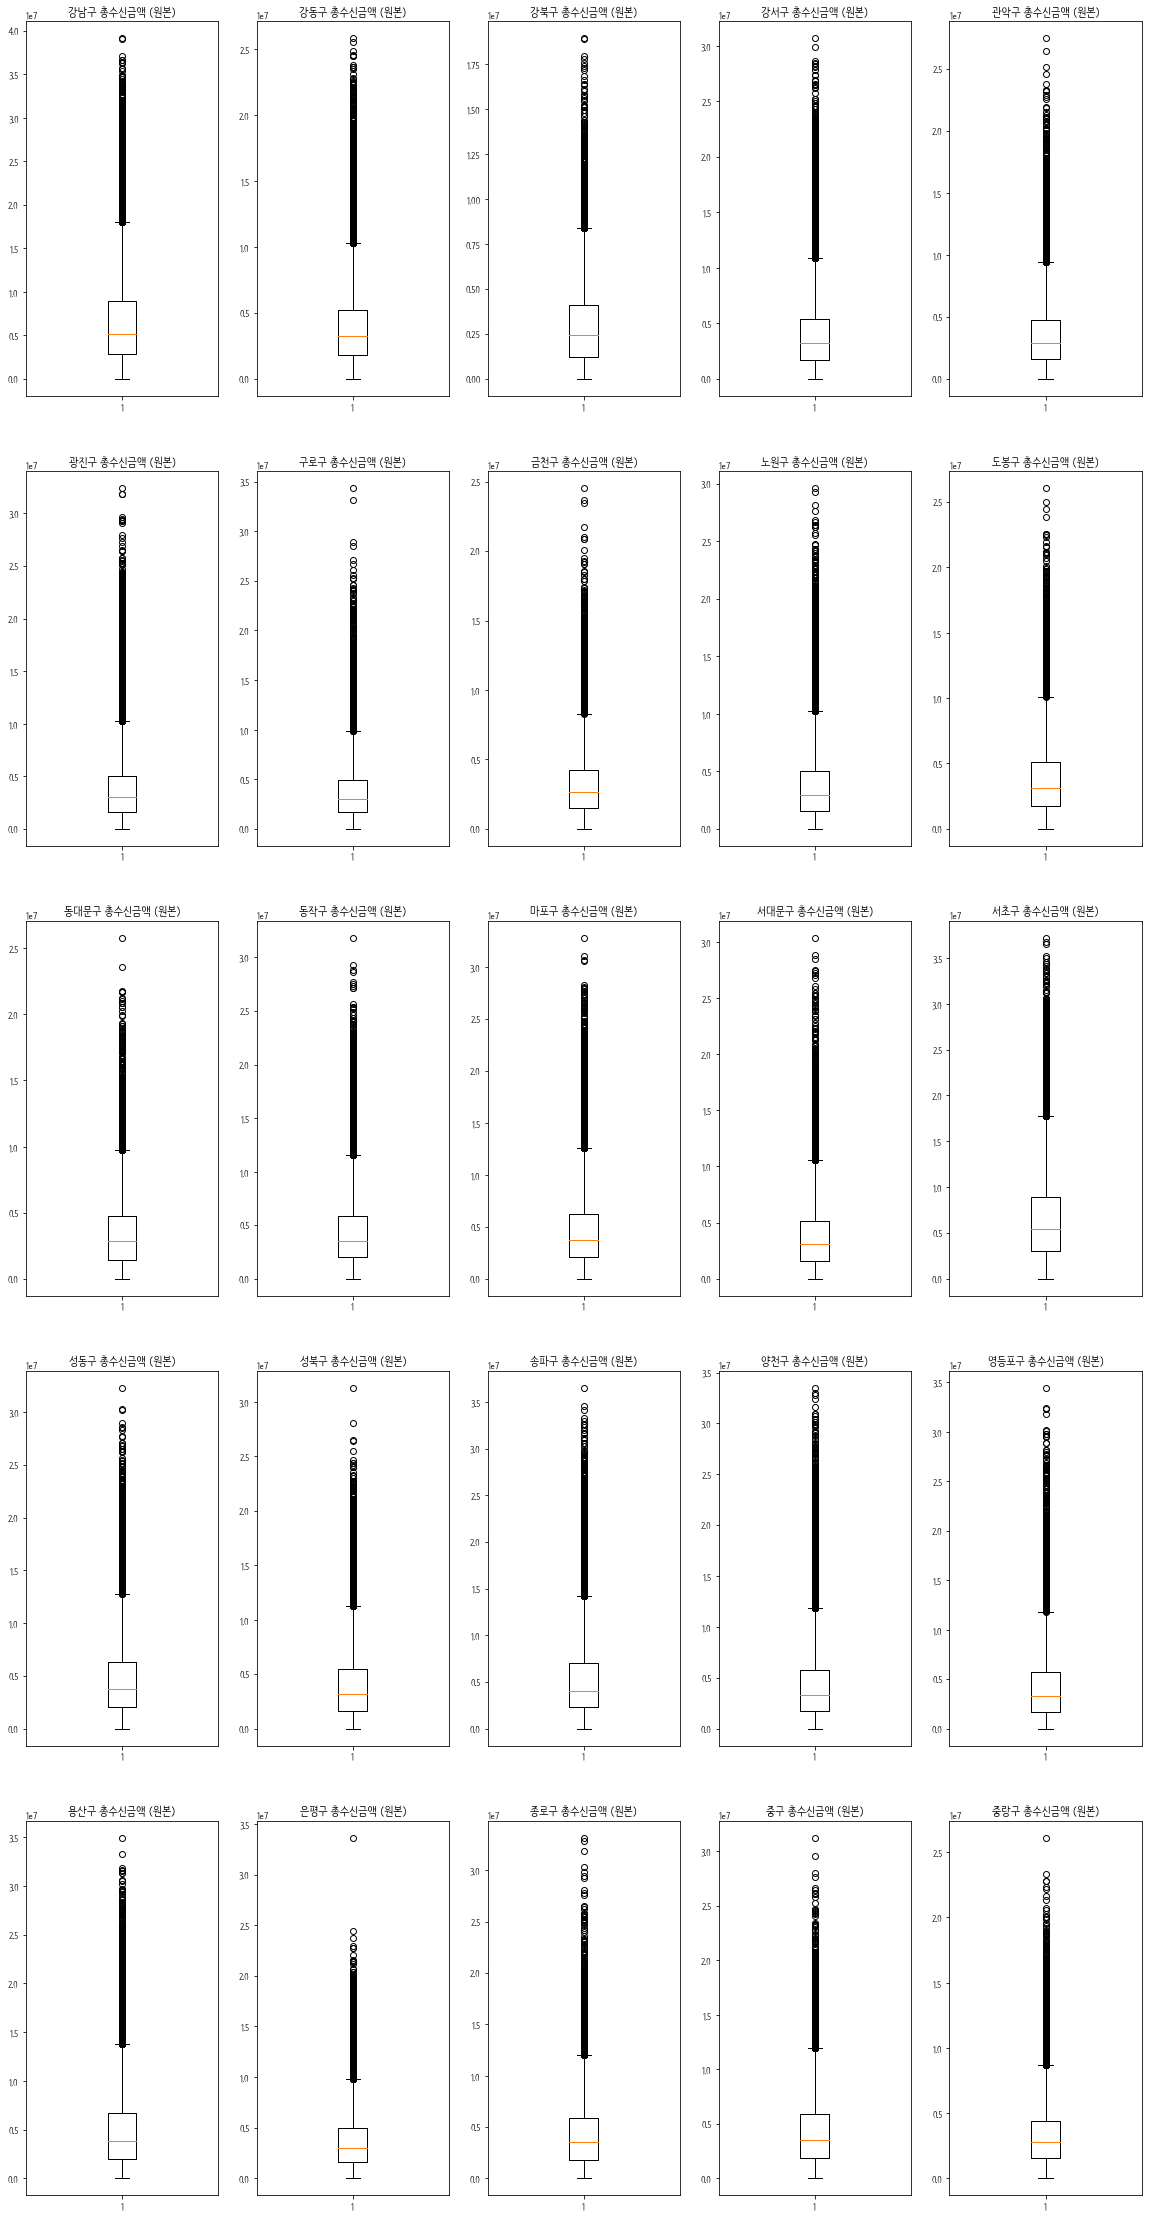

In [14]:
i, j, k = 0, 0, 0
fig, ax = plt.subplots(5, 5, figsize = (20, 40))
for j in range(5):
    for k in range(5):
        ax[j, k].boxplot(counties[i]['총수신금액'].values)
        ax[j, k].set_title(county[i] + ' 총수신금액 (원본)')
        i += 1

In [15]:
# 각 자치구 별 총수신금액 평균
mean = []
i = 0 
for i in range(25):
    mean.append(counties[i]['총수신금액'].mean())
    print(county[i] + ' : '+ str(counties[i]['총수신금액'].mean()))

강남구 : 6541343.397241057
강동구 : 3965753.776978893
강북구 : 2945819.888954571
강서구 : 4084911.932679561
관악구 : 3555417.3607439147
광진구 : 3886307.9240678675
구로구 : 3743025.301726619
금천구 : 3193268.7523884038
노원구 : 3682922.4409277937
도봉구 : 3765938.046337455
동대문구 : 3440613.4932017187
동작구 : 4373611.240613238
마포구 : 4656763.562523063
서대문구 : 3821235.628553642
서초구 : 6559954.5828341115
성동구 : 4701616.392067286
성북구 : 3974936.523535587
송파구 : 5233921.190936335
양천구 : 4336122.227209742
영등포구 : 4263833.714428191
용산구 : 5016620.02949538
은평구 : 3681698.72601626
종로구 : 4385111.112704805
중구 : 4401267.793918488
중랑구 : 3341291.616269324


---

# 🔔 예적금금액

### ⚪ 예적금금액 0 이하인 데이터 확인하기

In [16]:
iszero = []
i = 0
sum = 0
for i in range(25):
    iszero.append(counties[i]['예적금금액'] <= 0)
    print(county[i] + ' : ' + str(len(counties[i][iszero[i]])))
    sum += len(counties[i][iszero[i]])

print("\n\n총합 : " + str(sum))

강남구 : 27652
강동구 : 28238
강북구 : 26883
강서구 : 38721
관악구 : 35036
광진구 : 25539
구로구 : 27343
금천구 : 16070
노원구 : 38252
도봉구 : 24287
동대문구 : 27678
동작구 : 25120
마포구 : 25469
서대문구 : 24321
서초구 : 24363
성동구 : 20144
성북구 : 32781
송파구 : 37301
양천구 : 30374
영등포구 : 25979
용산구 : 15260
은평구 : 33242
종로구 : 12576
중구 : 10308
중랑구 : 29030


총합 : 661967


---

#### ⚫ 각 자치구 별 예적금금액  (원본)

In [17]:
# 각 자치구 별 예적금금액 평균
mean = []
i = 0 
for i in range(25):
    mean.append(counties[i]['예적금금액'].mean())
    print(county[i] + ' : '+ str(counties[i]['예적금금액'].mean()))

#print(mean)

강남구 : 6025718.346450604
강동구 : 3483932.6542864074
강북구 : 1886874.6282032335
강서구 : 3378374.6765105175
관악구 : 2954396.4152976573
광진구 : 2978121.559750733
구로구 : 3106328.6011031177
금천구 : 2849074.5870120246
노원구 : 3110664.092848834
도봉구 : 3446672.35006331
동대문구 : 2294034.459754174
동작구 : 4166105.9733314975
마포구 : 3781774.5400132844
서대문구 : 2657195.9815017935
서초구 : 5598611.8804951105
성동구 : 3868559.517834992
성북구 : 3106117.3216250264
송파구 : 4728171.445420656
양천구 : 3427500.1755406256
영등포구 : 3239280.0702997134
용산구 : 4597275.125523178
은평구 : 3051902.9399365457
종로구 : 3261919.1496110773
중구 : 3845104.9140794687
중랑구 : 2837825.596875582


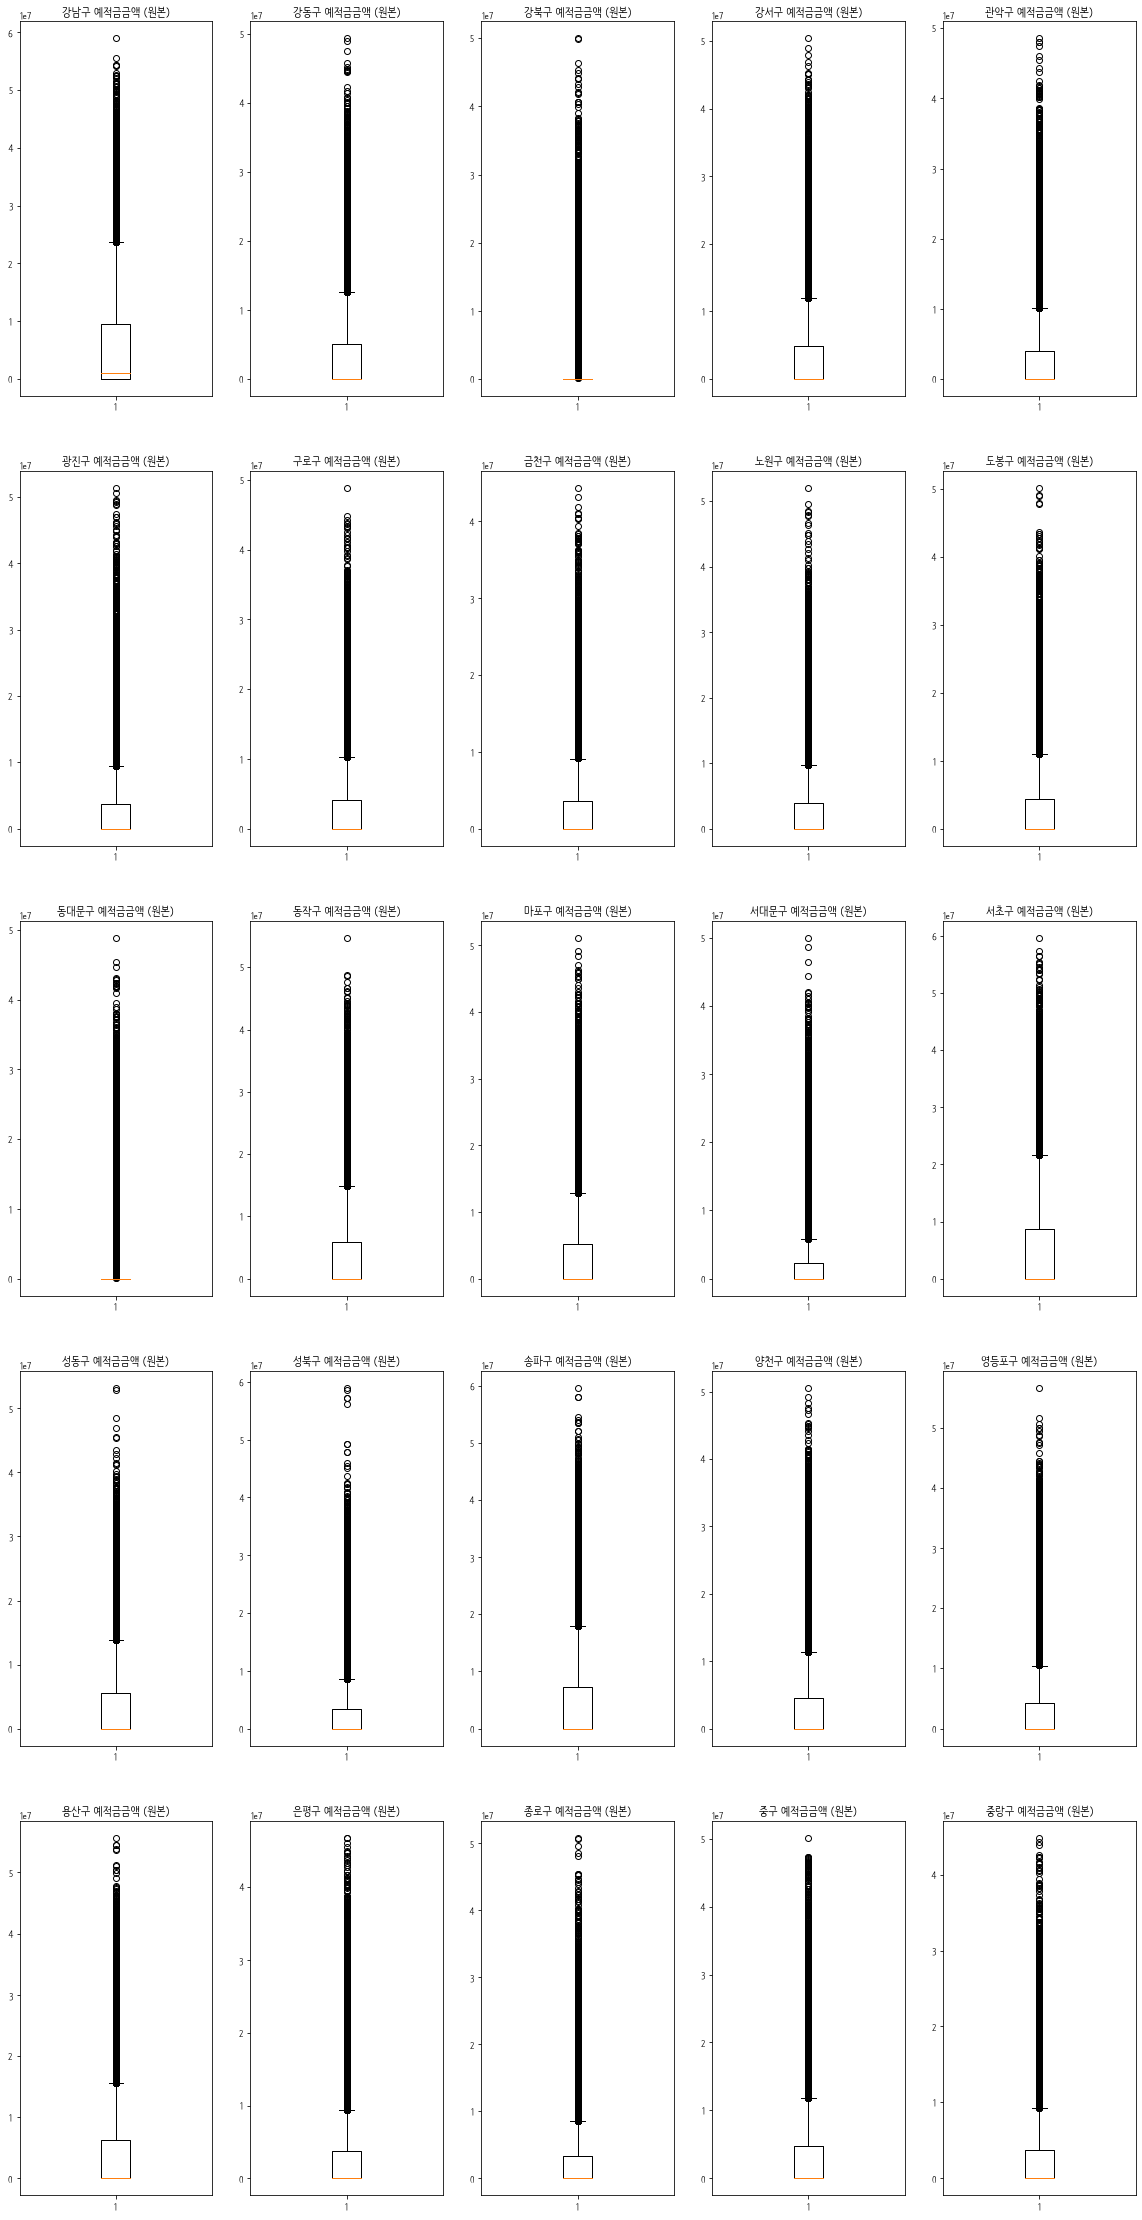

In [18]:
i, j, k = 0, 0, 0
fig, ax = plt.subplots(5, 5, figsize = (20, 40))
for j in range(5):
    for k in range(5):
        ax[j, k].boxplot(counties[i]['예적금금액'].values)
        ax[j, k].set_title(county[i] + ' 예적금금액 (원본)')
        i += 1

---

In [19]:
# 각 자치구 별로 '예적금금액'이 0 이하인 데이터에 평균값(자치구 단위)으로 넣어주기
i = 0
for i in range(25):
    counties[i].loc[iszero[i], '예적금금액'] = counties[i]['예적금금액'].mean()

C:\Users\serak\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


---

#### ⚫ 각 자치구 별 예적금금액 (가공 이후)

In [20]:
i = 0 
for i in range(25):
    print(county[i] + ' : '+ str(counties[i]['예적금금액'].mean()))

강남구 : 9022483.939079342
강동구 : 5653697.112323264
강북구 : 3386146.0682177646
강서구 : 5467688.788236391
관악구 : 4841719.467647667
광진구 : 4969592.195342716
구로구 : 5143171.357458122
금천구 : 4734457.086322272
노원구 : 5176483.341088828
도봉구 : 5701833.625044717
동대문구 : 4020642.5463637603
동작구 : 6567937.012761007
마포구 : 6151279.712576336
서대문구 : 4572995.44986081
서초구 : 8602730.047274731
성동구 : 6226235.460327462
성북구 : 5243879.9065542985
송파구 : 7306426.296469703
양천구 : 5613242.1518534
영등포구 : 5391317.123961991
용산구 : 7367330.342116768
은평구 : 5063629.244308556
종로구 : 5524946.414217607
중구 : 6377067.444698912
중랑구 : 4755828.881407372


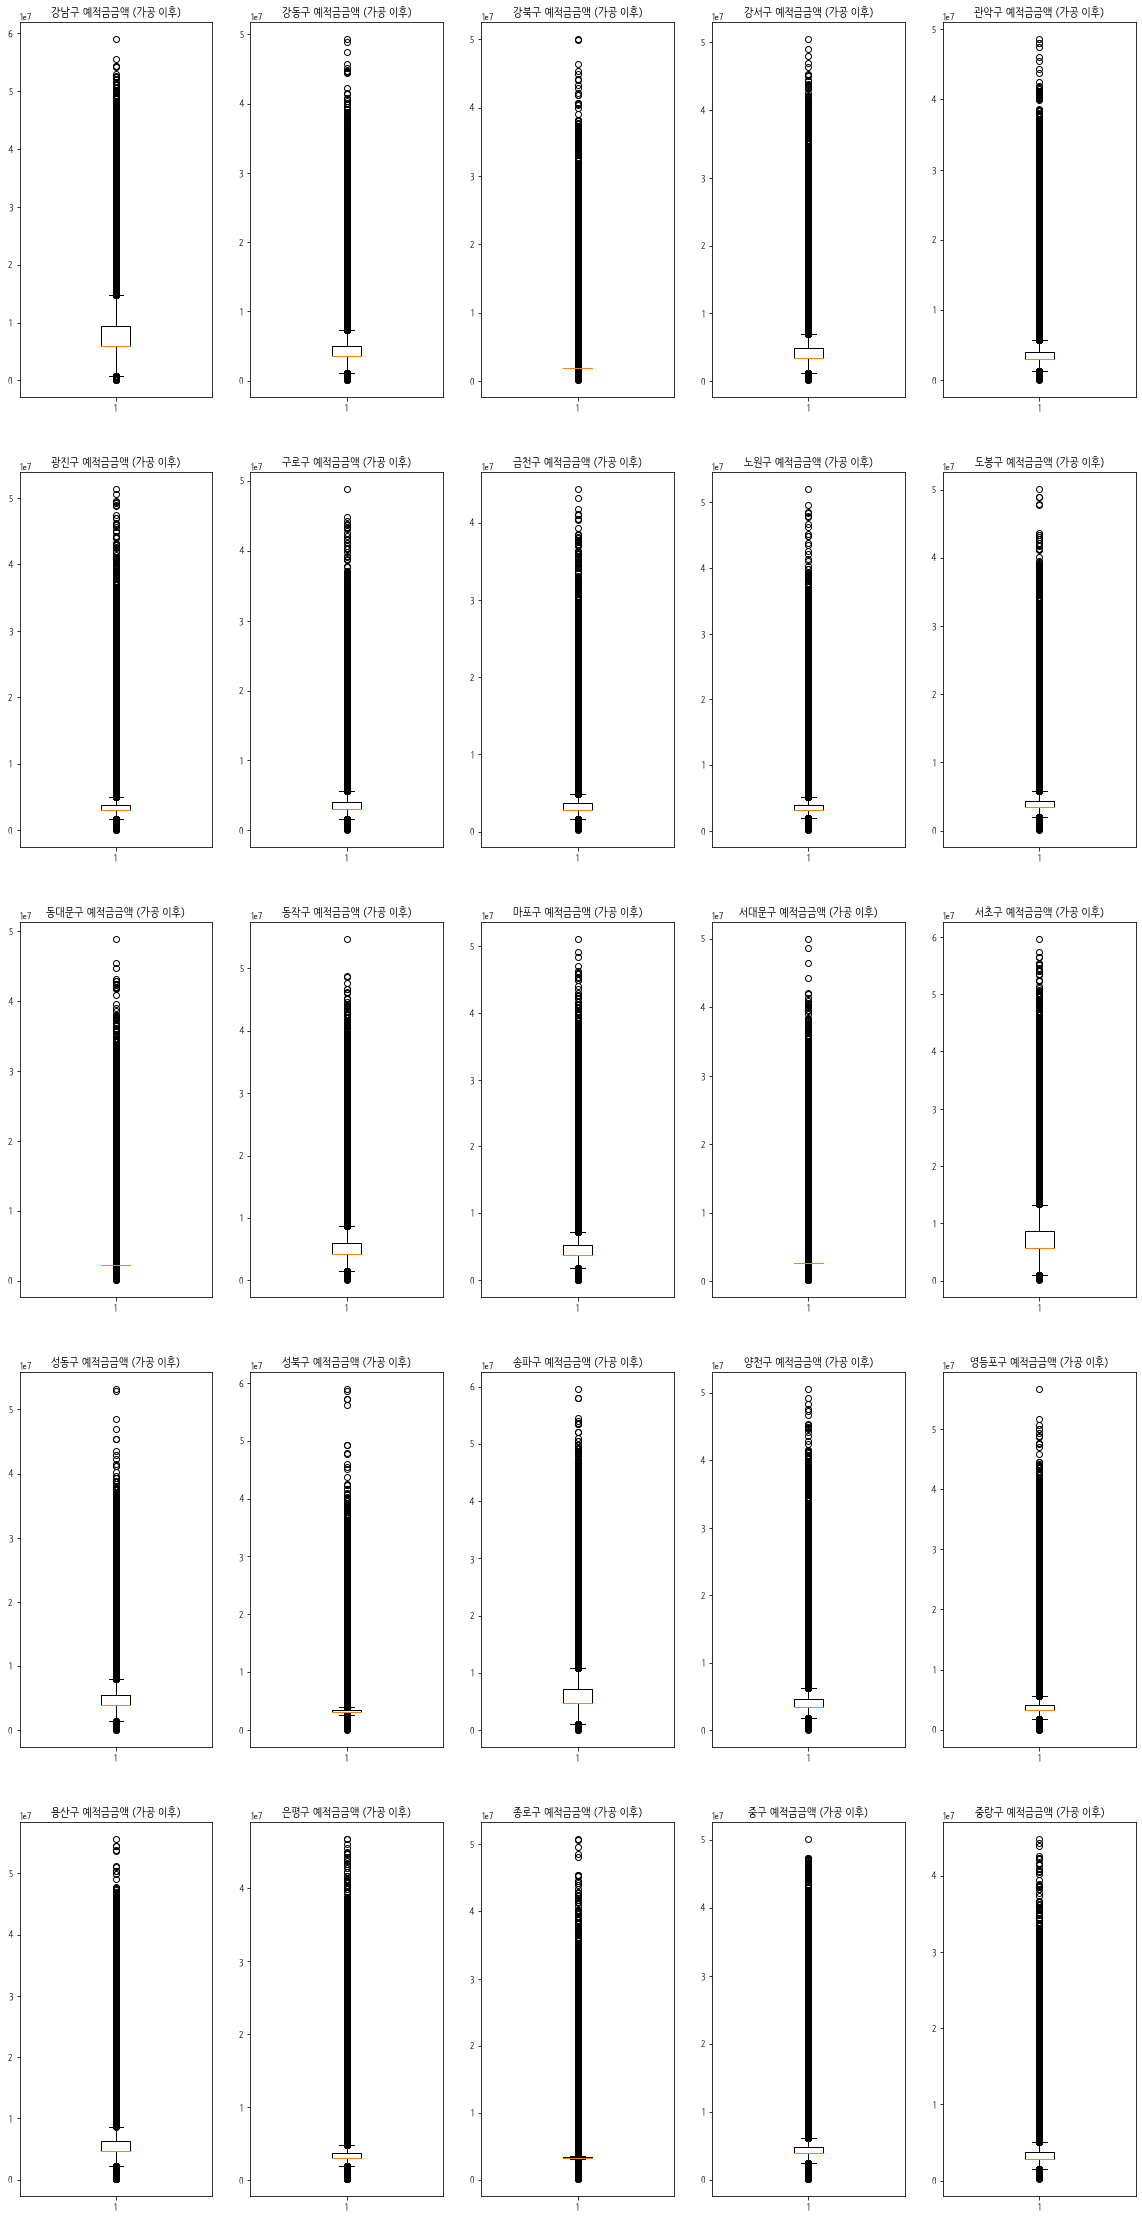

In [21]:
i, j, k = 0, 0, 0
fig, ax = plt.subplots(5, 5, figsize = (20, 40))
for j in range(5):
    for k in range(5):
        ax[j, k].boxplot(counties[i]['예적금금액'].values)
        ax[j, k].set_title(county[i] + ' 예적금금액 (가공 이후)')
        i += 1

---

# 🔔 신용대출금액

### ⚪ 신용대출금액 0 이하인 데이터 확인하기

In [22]:
iszero = []
i = 0
sum = 0
for i in range(25):
    iszero.append(counties[i]['신용대출금액'] <= 0)
    print(county[i] + ' : ' + str(len(counties[i][iszero[i]])))
    sum += len(counties[i][iszero[i]])

print("\n\n총합 : " + str(sum))

강남구 : 54448
강동구 : 44904
강북구 : 33792
강서구 : 61685
관악구 : 54560
광진구 : 37985
구로구 : 41388
금천구 : 24217
노원구 : 57094
도봉구 : 37052
동대문구 : 36684
동작구 : 43338
마포구 : 40166
서대문구 : 33565
서초구 : 44388
성동구 : 32747
성북구 : 47362
송파구 : 67547
양천구 : 47149
영등포구 : 38505
용산구 : 25046
은평구 : 50230
종로구 : 17957
중구 : 15546
중랑구 : 42882


총합 : 1030237


---

# 🔔 담보대출금액

### ⚪ 담보대출금액 0 이하인지 확인하기

In [23]:
iszero = []
i = 0
sum = 0
for i in range(25):
    iszero.append(counties[i]['담보대출금액'] <= 0)
    print(county[i] + ' : ' + str(len(counties[i][iszero[i]])))
    sum += len(counties[i][iszero[i]])

print("\n\n총합 : " + str(sum))

강남구 : 54057
강동구 : 44656
강북구 : 33699
강서구 : 60599
관악구 : 53996
광진구 : 37801
구로구 : 40782
금천구 : 23606
노원구 : 56994
도봉구 : 36807
동대문구 : 36441
동작구 : 42936
마포구 : 39790
서대문구 : 33407
서초구 : 44443
성동구 : 32683
성북구 : 47178
송파구 : 66975
양천구 : 46941
영등포구 : 38056
용산구 : 24865
은평구 : 49609
종로구 : 17937
중구 : 15373
중랑구 : 42604


총합 : 1022235


#### 🤔 '신용대출금액'과 '담도대출금액'의 경우, 대부분의 데이터가 0 에 해당함 .. 오똑하징

---

# 🔔 급여입금 (=직장인여부)

#### ⚫ 각 자치구 별 급여입금 평균 - 전체 대상 (직장인 X 포함)

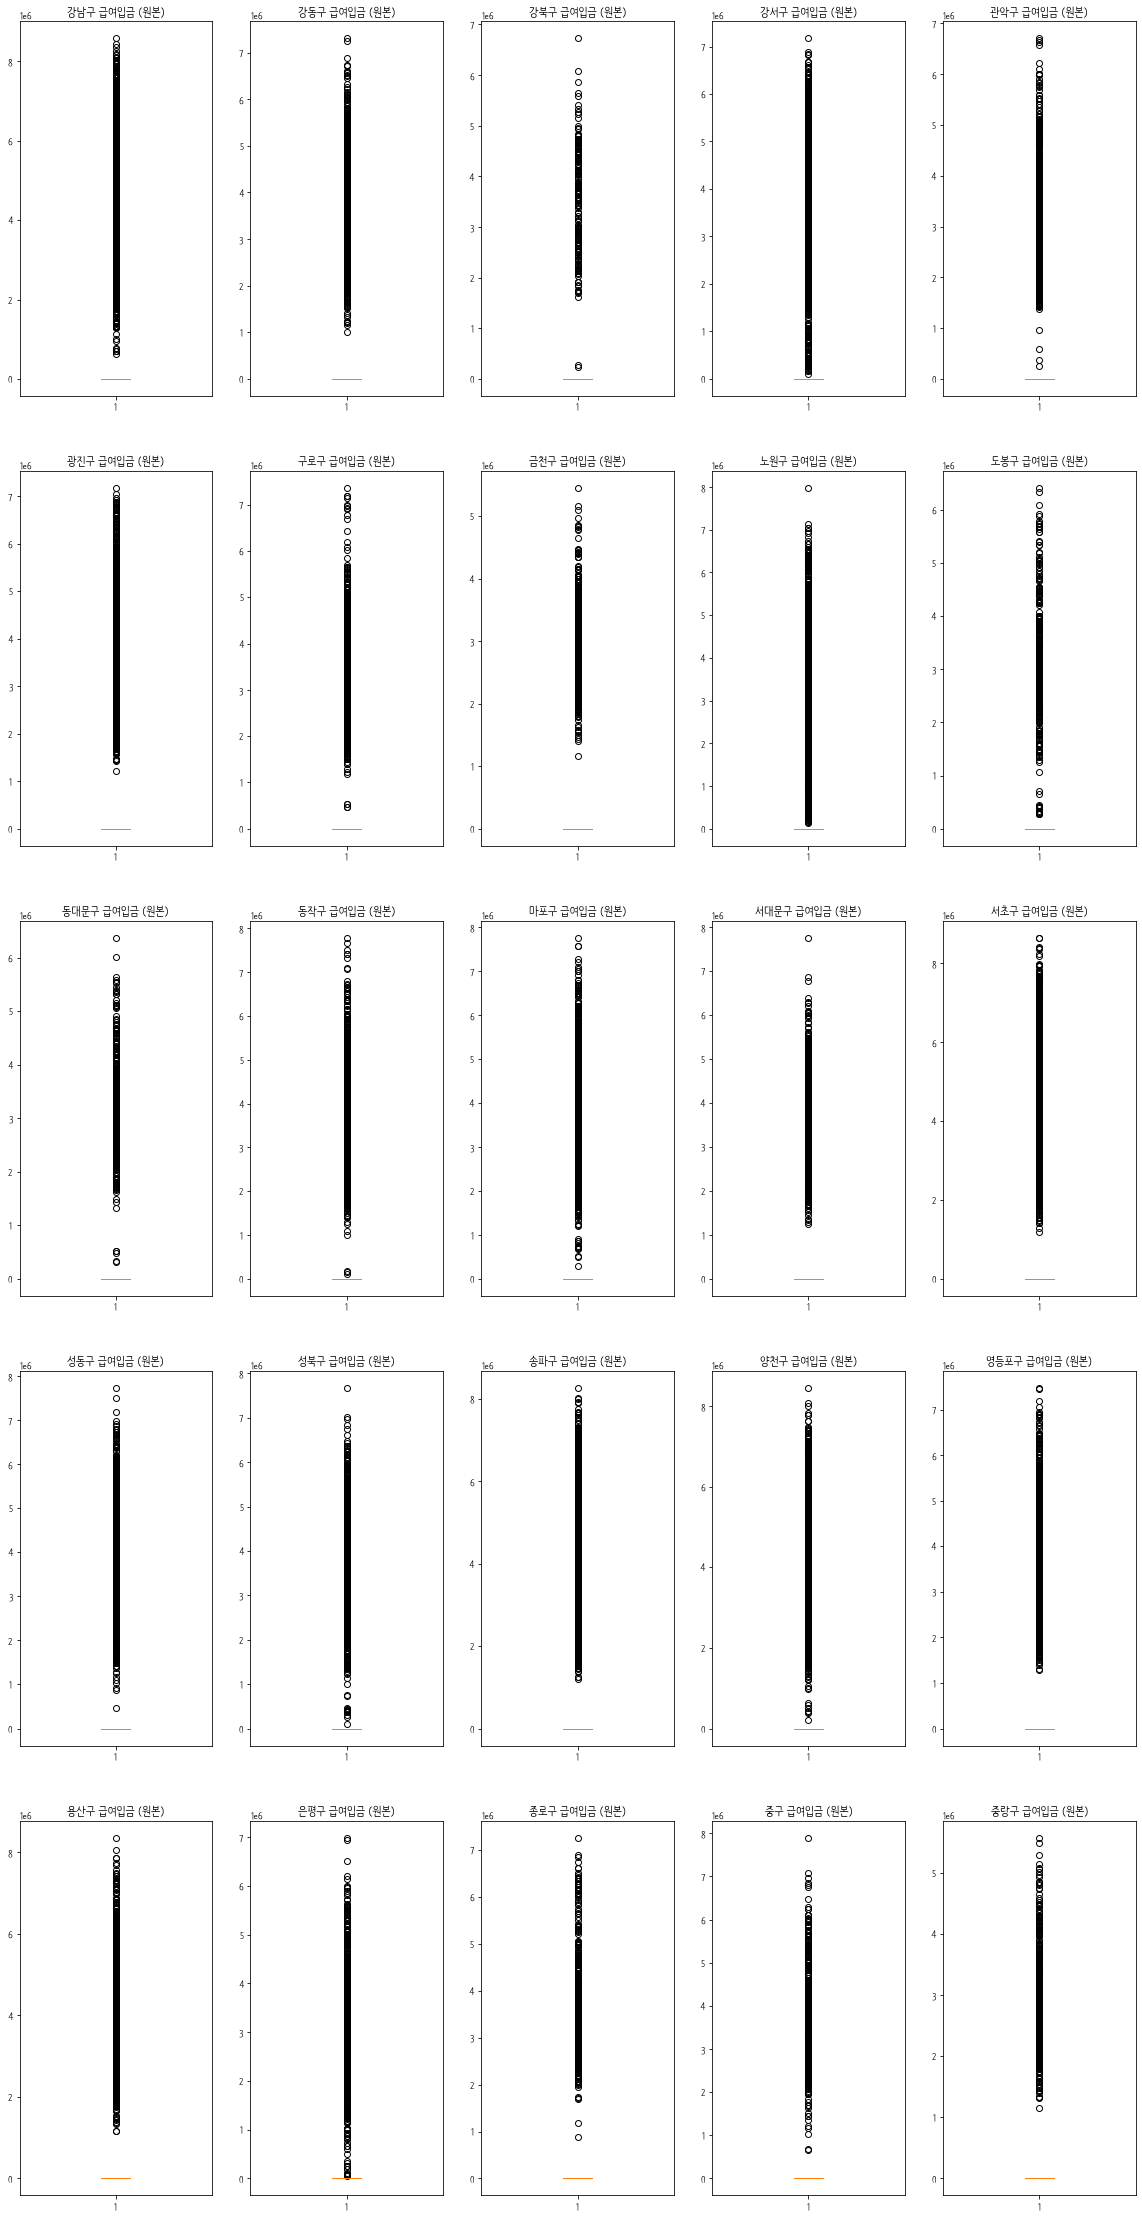

In [24]:
# 각 자치구 별 급여입금 평균 - 전체 대상 (직장인 X 포함)
i, j, k = 0, 0, 0
fig, ax = plt.subplots(5, 5, figsize = (20, 40))
for j in range(5):
    for k in range(5):
        ax[j, k].boxplot(counties[i]['급여입금'].values)
        ax[j, k].set_title(county[i] + ' 급여입금 (원본)')
        i += 1

---

### ⚪ 자치구 별 급여입금 받는 인원수 확인하기

In [25]:
# 자치구 별로 급여입금 받는 인원수 확인하기
isworker = []
i = 0
sum = 0
for i in range(25):
    isworker.append(counties[i]['급여입금'] > 0)
    print(county[i] + ' : ' + str(len(counties[i][isworker[i]])))
    sum += len(counties[i][isworker[i]])

print("\n\n총합 : " + str(sum))

강남구 : 3341
강동구 : 1092
강북구 : 187
강서구 : 3573
관악구 : 2712
광진구 : 1466
구로구 : 1345
금천구 : 603
노원구 : 1676
도봉구 : 367
동대문구 : 458
동작구 : 1544
마포구 : 1849
서대문구 : 798
서초구 : 2449
성동구 : 1685
성북구 : 950
송파구 : 2826
양천구 : 1663
영등포구 : 2064
용산구 : 1005
은평구 : 926
종로구 : 438
중구 : 437
중랑구 : 555


총합 : 36009


#### ⚫ 각 자치구 별 급여입금 평균 - 직장인 대상 (직장인 X 제외)

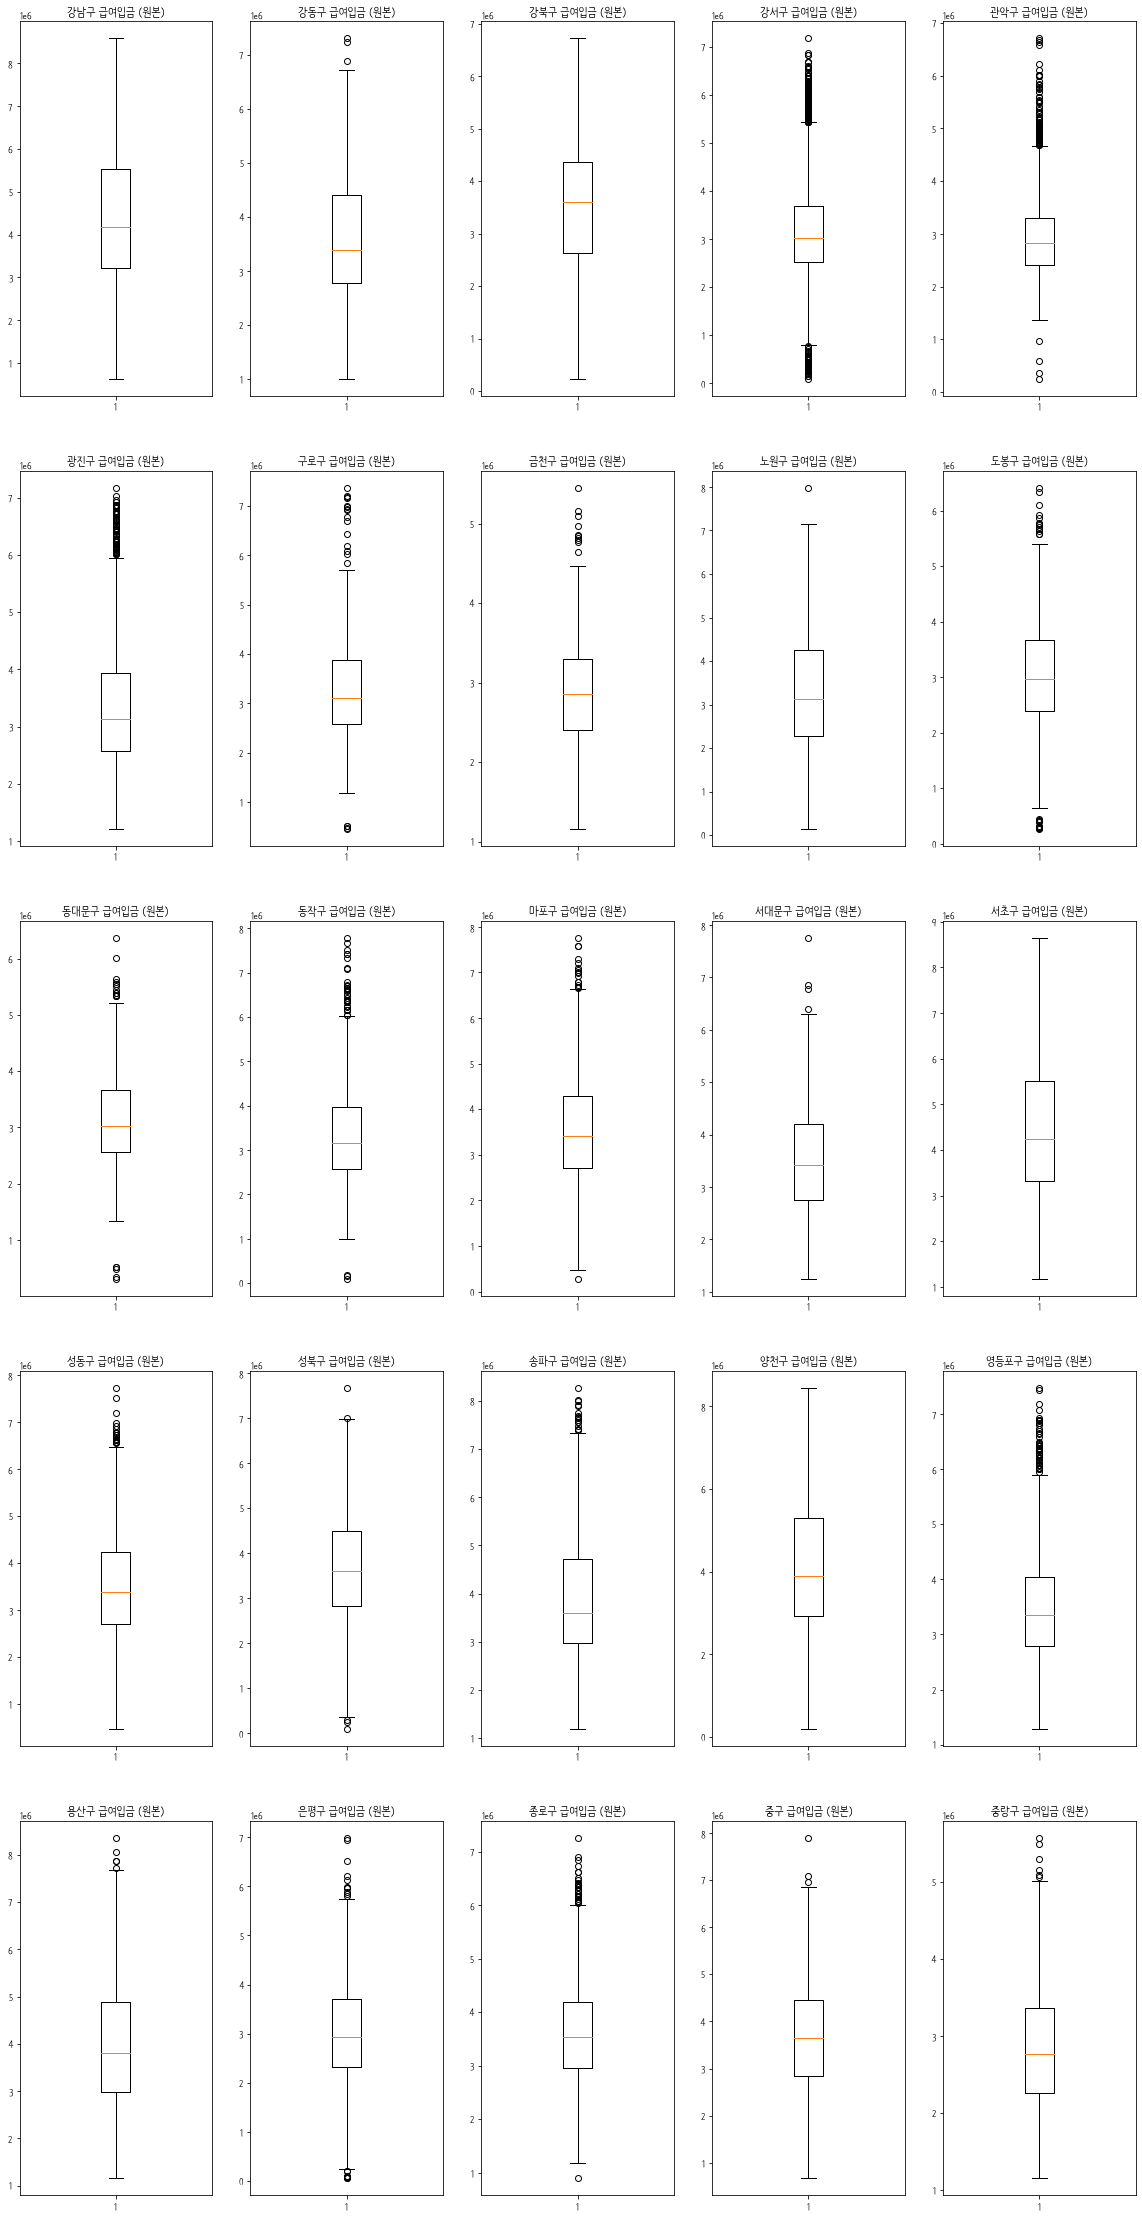

In [26]:
# 각 자치구 별 급여입금 평균 - 직장인 대상 (직장인 X 제외)
i, j, k = 0, 0, 0
fig, ax = plt.subplots(5, 5, figsize = (20, 40))
for j in range(5):
    for k in range(5):
        ax[j, k].boxplot((counties[i][isworker[i]]['급여입금']).values)
        ax[j, k].set_title(county[i] + ' 급여입금 (원본)')
        i += 1

---

### 🟡 직장인이 아닌 사람들의 '급여입금' 데이터에 직장인 대상 급여입금 평균값 넣어주기

#### 🤔 사실 직장인에 해당하는 급여입금으로 구할거면 안 넣어줘도 되는데 왜 넣은거지 ~

#### ⚫ 각 자치구 별 직장인 대상 급여입금 평균
** 급여입금이 없는 사람들, 즉, 직장인에 해당하지 않는 사람들 제외

In [27]:
# 각 자치구 별 직장인 대상 급여입금 평균 
mean = []
i = 0 
for i in range(25):
    mean.append(counties[i][isworker[i]]['급여입금'].mean())
    print(county[i] + ' : '+ str(counties[i][isworker[i]]['급여입금'].mean()))

강남구 : 4397614.1888656095
강동구 : 3586378.6346153845
강북구 : 3506619.497326203
강서구 : 3162227.875174923
관악구 : 2925671.028761062
광진구 : 3398319.8499317872
구로구 : 3261096.3390334575
금천구 : 2893865.8623548923
노원구 : 3170992.937947494
도봉구 : 3057016.514986376
동대문구 : 3139883.1048034932
동작구 : 3362681.577720207
마포구 : 3571755.8761492698
서대문구 : 3522997.9373433585
서초구 : 4434539.155573703
성동구 : 3542189.1080118692
성북구 : 3668333.137894737
송파구 : 3898295.2876857747
양천구 : 4096984.0384846665
영등포구 : 3492250.715116279
용산구 : 3993082.6845771144
은평구 : 3049636.0593952485
종로구 : 3684768.51369863
중구 : 3735404.5926773455
중랑구 : 2878703.6288288287


In [28]:
# '직장인여부' == 0 (급여입금' <= 0) 값인지 판단하는 True/False
iszero = []
i = 0
for i in range(25):
    iszero.append(counties[i]['직장인여부'] == 0)

    
# '급여입금'이 0 인 데이터에 직장인 급여입금 평균값 넣어주기
i = 0
for i in range(25):
    counties[i].loc[iszero[i], '급여입금'] = mean[i]
    #print(mean[i])

C:\Users\serak\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


---

#### ⚫ 급여입금 평균 (가공 이후)

In [29]:
# 각 자치구 별 급여입금 평균 (가공 이후)
i = 0 
for i in range(25):
    print(county[i] + ' : '+ str(counties[i]['급여입금'].mean()))

강남구 : 4397614.188866753
강동구 : 3586378.6346137
강북구 : 3506619.4973286083
강서구 : 3162227.875175095
관악구 : 2925671.0287604546
광진구 : 3398319.849930621
구로구 : 3261096.339034762
금천구 : 2893865.862356118
노원구 : 3170992.9379485366
도봉구 : 3057016.514985027
동대문구 : 3139883.104801664
동작구 : 3362681.5777176246
마포구 : 3571755.876148162
서대문구 : 3522997.937344065
서초구 : 4434539.155576366
성동구 : 3542189.1080132956
성북구 : 3668333.1378970277
송파구 : 3898295.287688602
양천구 : 4096984.0384832253
영등포구 : 3492250.715117605
용산구 : 3993082.68457551
은평구 : 3049636.059397407
종로구 : 3684768.5137003814
중구 : 3735404.5926764
중랑구 : 2878703.6288297414
